In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


```
ASTARR | GATA1 | chrX:47,786,508-49,786,637
WSTARR | GATA1 | chrX:47,786,887-49,786,530
TMPRA  | GATA1 | chrX:47,786,401-49,786,750

ASTARR | MYC | chr8:126,735,973-128,736,166
WSTARR | MYC | chr8:126,735,996-128,736,142
TMPRA  | MYC | chr8:126,735,901-128,736,250
```

In [2]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")

dat_peak = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
print(dim(dat_peak))
head(dat_peak)

[1] 247520      3


Chrom,Start,End
<chr>,<dbl>,<dbl>
chr1,10015,10442
chr1,14253,14645
chr1,16015,16477
chr1,17237,17772
chr1,28903,29613
chr1,30803,31072


In [3]:
dat = dat_peak
dat = dat %>% mutate(Len = End - Start)
dat_peak_gata1 = dat %>% dplyr::filter(Chrom == "chrX", Start >=  47786400, End <=  49786500)
dat_peak_myc   = dat %>% dplyr::filter(Chrom == "chr8", Start >= 126735900, End <= 128736100)

print(dim(dat_peak_gata1))
print(dim(dat_peak_myc))

[1] 197   4
[1] 188   4


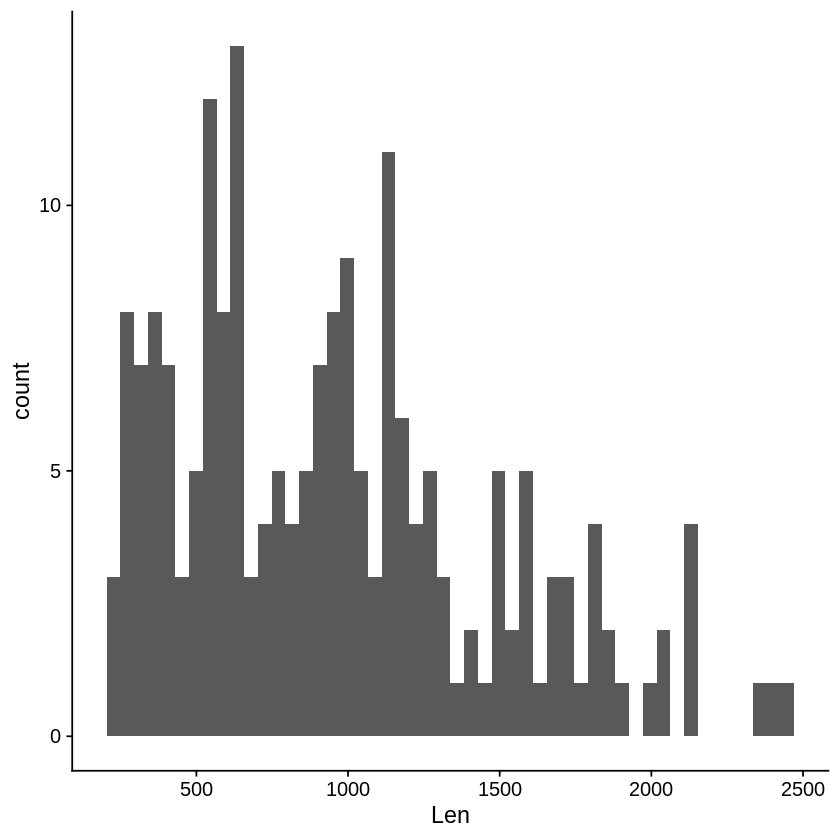

In [8]:
gpt = ggplot(dat_peak_gata1, aes(x=Len)) + geom_histogram(bins=50) + theme_cowplot()
print(gpt)

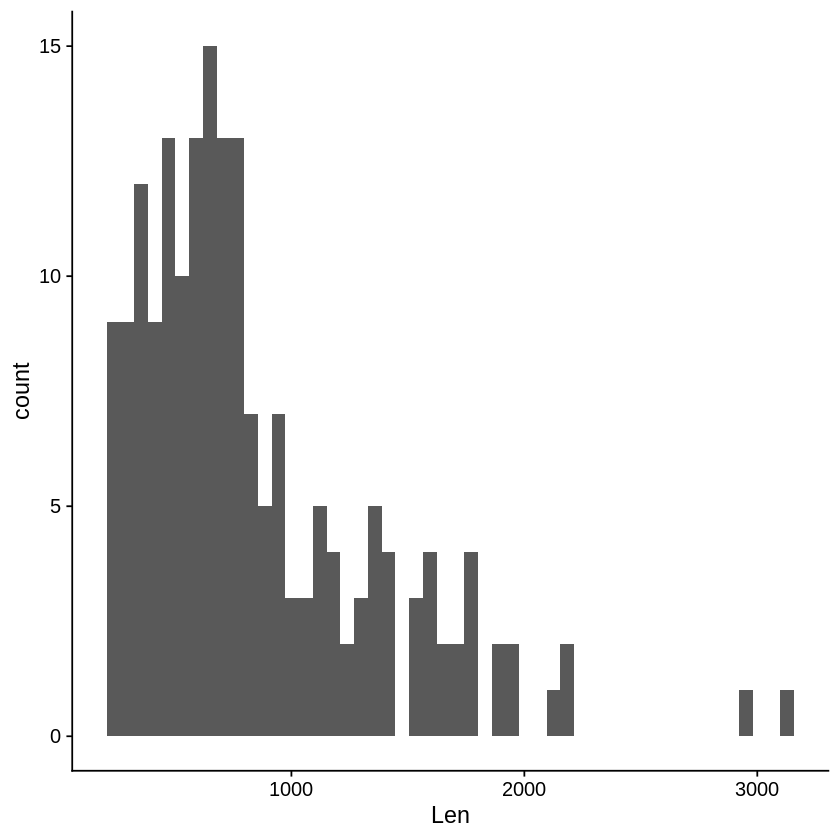

In [9]:
gpt = ggplot(dat_peak_myc, aes(x=Len)) + geom_histogram(bins=50) + theme_cowplot()
print(gpt)

In [11]:
summary(dat_peak_gata1)

    Chrom               Start               End                Len        
 Length:197         Min.   :47796208   Min.   :47796828   Min.   : 231.0  
 Class :character   1st Qu.:48581398   1st Qu.:48582020   1st Qu.: 547.0  
 Mode  :character   Median :48841324   Median :48842353   Median : 893.0  
                    Mean   :48835252   Mean   :48836212   Mean   : 960.6  
                    3rd Qu.:49138654   3rd Qu.:49140807   3rd Qu.:1234.0  
                    Max.   :49754378   Max.   :49754670   Max.   :2452.0  

In [10]:
summary(dat_peak_myc)

    Chrom               Start                End                 Len        
 Length:188         Min.   :126778902   Min.   :126779728   Min.   : 225.0  
 Class :character   1st Qu.:127805012   1st Qu.:127805741   1st Qu.: 483.0  
 Mode  :character   Median :127971150   Median :127971947   Median : 697.5  
                    Mean   :127929551   Mean   :127930392   Mean   : 840.3  
                    3rd Qu.:128147757   3rd Qu.:128148249   3rd Qu.:1088.8  
                    Max.   :128734251   Max.   :128734743   Max.   :3117.0  